<img src="./image/init.jpg" alt="presentation" />

# 1- Motivation :

## 1-1 American Sign Language (ASL)

<p>American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals.  The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.</p>
<p><img src="https://assets.datacamp.com/production/project_509/img/asl.png" alt="american sign language"></p>


## 1-2 Dataset :

<p>
    Link to the dataset : <a>https://www.kaggle.com/grassknoted/asl-alphabet</a>
</p>
<li>
    The dataset contains <strong> 87000 images </strong> with a dimension of 200×200.
<li>
    There are <strong>29 classes </strong> in total. 26 of these classes are letters from A-Z.
    <li>
Then there are three more classes that correspond to SPACE, DELETE, and NOTHING.
  <li>There are <strong> 3000 images from each class </strong>.



## 1-3 visualizing :

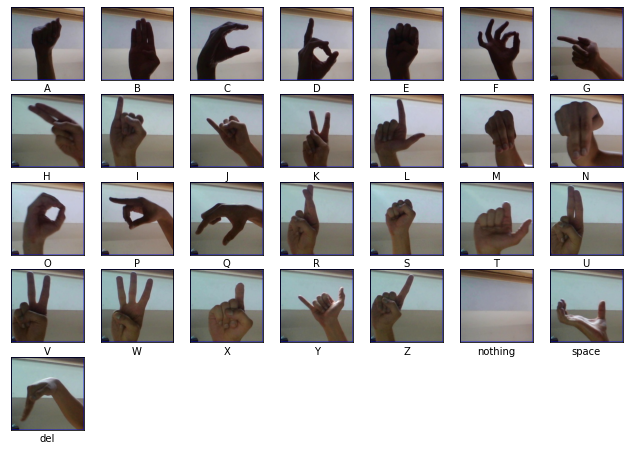

In [10]:
import matplotlib.pyplot as plt
train_dir = './dataset/asl_alphabet_train/asl_alphabet_train/'
test_dir = './dataset/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

# 2- Work flow :


<li> The necessary packages are loaded.
<li> User is given the liberty to choose the number of iterations to train the CNN model.
<li> The dataset of images with respective paths is loaded and independent and dependent variables are assigned to X and y respectively.
<li>The dataset is then split for training and testing on which the CNN model is built.

<li> Two functions, fit (for training the model on the train dataset) and validation (for checking the models performance) are used.
<li> The functions compute and return the loss and accuracy of training and validatin dataset on the model.
<li> These parameters are appended to lists on each epoch so that they can be plotted and visualised.
<li> Accuracy and loss plots are then plotted using matplotlib.
<li> Testing the model.

# 3- Pre-processing images :

>  **_NOTE:_**  
Since the dataset is very large, it will take much more time and resources to train the model,
for that reason a subset is used .

In [1]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm

In [2]:
# get all the directory paths
dir_paths = os.listdir('./dataset/asl_alphabet_train/asl_alphabet_train/')
dir_paths.sort()
root_path = './dataset/asl_alphabet_train/asl_alphabet_train/'

In [12]:
num_images=int(input("Enter the number of images required for pre-processing"))
print(f"Preprocessing {num_images} from each category...")
# get --num-images images from each category
for idx, dir_path  in tqdm(enumerate(dir_paths), total=len(dir_paths)):
    all_images = os.listdir(f"{root_path}/{dir_path}")
    os.makedirs(f"./dataset/input/preprocessed_image/{dir_path}", exist_ok=True)
    for i in range(num_images): # how many images to preprocess for each category
        # generate a random id between 0 and 2999
        rand_id = (random.randint(0, 2999))
        image = cv2.imread(f"{root_path}/{dir_path}/{all_images[rand_id]}")
        image = cv2.resize(image, (224, 224))
        cv2.imwrite(f"./dataset/input/preprocessed_image/{dir_path}/{dir_path}{i}.jpg", image)
print('DONE')

Enter the number of images required for pre-processing500


  0%|                                                                                                                                         | 0/29 [00:00<?, ?it/s]

Preprocessing 500 from each category...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [03:52<00:00,  8.01s/it]

DONE


>  **_NOTE:_**   we will train our model with 14500 images ( 500 from each category * 29 ) instead of 87000 .

# 4- Creating a csv file with labels and path :

In [4]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from imutils.paths import list_images
from imutils import paths
# get all the image paths
image_paths = list(paths.list_images('./dataset/input/preprocessed_image'))
# create a DataFrame 
data = pd.DataFrame()
labels = []
for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    label = image_path.split(os.path.sep)[-2]
    # save the relative path for mapping image to target
    data.loc[i, 'image_path'] = image_path
    labels.append(label)
labels = np.array(labels)
# one hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"The first one hot encoded labels: {labels[0]}")
print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(labels)}")
for i in range(len(labels)):
    index = np.argmax(labels[i])
    data.loc[i, 'target'] = int(index)
# shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)
# save as CSV file
data.to_csv('./dataset/input/data.csv', index=False)
# pickle the binarized labels
print('Saving the binarized labels as pickled file')
joblib.dump(lb, './dataset/output/lb.pkl')



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14500/14500 [00:12<00:00, 1181.54it/s]


The first one hot encoded labels: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mapping the first one hot encoded label to its category: A
Total instances: 14500
Saving the binarized labels as pickled file


['./dataset/output/lb.pkl']

In [5]:
print(data.head(5))
print(data.tail(5))

                                      image_path  target
0  ./dataset/input/preprocessed_image\G\G225.jpg     6.0
1   ./dataset/input/preprocessed_image\R\R64.jpg    17.0
2  ./dataset/input/preprocessed_image\E\E169.jpg     4.0
3  ./dataset/input/preprocessed_image\D\D236.jpg     3.0
4  ./dataset/input/preprocessed_image\N\N141.jpg    13.0
                                          image_path  target
14495  ./dataset/input/preprocessed_image\B\B141.jpg     1.0
14496  ./dataset/input/preprocessed_image\C\C121.jpg     2.0
14497  ./dataset/input/preprocessed_image\A\A308.jpg     0.0
14498  ./dataset/input/preprocessed_image\P\P367.jpg    15.0
14499  ./dataset/input/preprocessed_image\G\G332.jpg     6.0


# 5- Training the CNN model :

<p>
<ul> <strong> A convolutional part: </strong>
<li> Its final objective is to extract specific characteristics from each image by compressing them in order to reduce their initial size.
 <li>In short,the input image is passed through a succession of filters, creating new images called convolution maps. 
 <li>Finally, the convolution maps obtained are concatenated into a feature vector called CNN code.
      </ul>
      </p>



<ul> <strong> A classification part: </strong>
<li>The CNN code obtained at the output of the convolutional part is provided as input in a second part, made of fully connected layers called Multi Layers Perceptron (MLP). 
  <li>  The role of this part is to combine the characteristics of the CNN code to classify the image. 
    </ul>

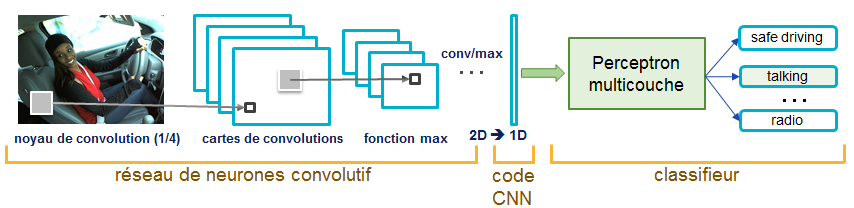

In [6]:
import pandas as pd
import joblib
import numpy as np
import torch
import random
import albumentations
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import time
import cv2
import cnn_models
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

Loading label binarizer...


In [7]:
num_epoch=int(input("Enter the number of epochs"))
''' SEED Everything '''
def seed_everything(SEED=5):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True 
SEED=5
seed_everything(SEED=SEED)
''' SEED Everything '''
# set computation device
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")


# ### Reading and preparing train and validation set

# read the data.csv file and get the image paths and labels
df = pd.read_csv('./dataset/input/data.csv')
X = df.image_path.values
y = df.target.values
(xtrain, xtest, ytrain, ytest) = (train_test_split(X, y, 
                                test_size=0.15, random_state=42))
print(f"Training on {len(xtrain)} images")
print(f"Validationg on {len(xtest)} images")


# ###custom dataset module

# image dataset module
class ASLImageDataset(Dataset):
    def __init__(self, path, labels):
        self.X = path
        self.y = labels
        # apply augmentations
        self.aug = albumentations.Compose([
            albumentations.Resize(224, 224, always_apply=True),
        ])
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        image = cv2.imread(self.X[i])
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        label = self.y[i]
        return torch.tensor(image, dtype=torch.float), torch.tensor(label, dtype=torch.long)

train_data = ASLImageDataset(xtrain, ytrain)
test_data = ASLImageDataset(xtest, ytest)
 
# dataloaders
trainloader = DataLoader(train_data, batch_size=32, shuffle=True)
testloader = DataLoader(test_data, batch_size=32, shuffle=False)


# ### preparing our neural network

# model = models.MobineNetV2(pretrained=True, requires_grad=False)
model = cnn_models.CustomCNN().to(device)
print(model)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")


# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# loss function
criterion = nn.CrossEntropyLoss()


# training function
def fit(model, dataloader):
    print('Training')
    model.train()
    running_loss = 0.0
    running_correct = 0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
        
    train_loss = running_loss/len(dataloader.dataset)
    train_accuracy = 100. * running_correct/len(dataloader.dataset)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}")
    
    return train_loss, train_accuracy


#validation function
def validate(model, dataloader):
    print('Validating')
    model.eval()
    running_loss = 0.0
    running_correct = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(test_data)/dataloader.batch_size)):
            data, target = data[0].to(device), data[1].to(device)
            outputs = model(data)
            loss = criterion(outputs, target)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            running_correct += (preds == target).sum().item()
        
        val_loss = running_loss/len(dataloader.dataset)
        val_accuracy = 100. * running_correct/len(dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}')
        
        return val_loss, val_accuracy


train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
start = time.time()
for epoch in range(num_epoch):
    print(f"Epoch {epoch+1} of {num_epoch}")
    train_epoch_loss, train_epoch_accuracy = fit(model, trainloader)
    val_epoch_loss, val_epoch_accuracy = validate(model, testloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
end = time.time()


Enter the number of epochs5


  0%|                                                                                                                                        | 0/385 [00:00<?, ?it/s]

Computation device: cpu
Training on 12325 images
Validationg on 2175 images
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=29, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
277,949 total parameters.
277,949 training parameters.
Epoch 1 of 5
Training


<ipython-input-7-b9ca1214d5dc>:49: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return torch.tensor(image, dtype=torch.float), torch.tensor(label, dtype=torch.long)
386it [07:24,  1.15s/it]                                                                                                                                             
  0%|                                                                                                                                         | 0/67 [00:00<?, ?it/s]

Train Loss: 0.0767, Train Acc: 26.57
Validating


68it [00:33,  2.06it/s]                                                                                                                                              
  0%|                                                                                                                                        | 0/385 [00:00<?, ?it/s]

Val Loss: 0.0502, Val Acc: 48.05
Epoch 2 of 5
Training


386it [07:16,  1.13s/it]                                                                                                                                             
  0%|                                                                                                                                         | 0/67 [00:00<?, ?it/s]

Train Loss: 0.0315, Train Acc: 67.63
Validating


68it [00:32,  2.06it/s]                                                                                                                                              
  0%|                                                                                                                                        | 0/385 [00:00<?, ?it/s]

Val Loss: 0.0220, Val Acc: 75.08
Epoch 3 of 5
Training


386it [07:16,  1.13s/it]                                                                                                                                             
  0%|                                                                                                                                         | 0/67 [00:00<?, ?it/s]

Train Loss: 0.0141, Train Acc: 85.23
Validating


68it [00:33,  2.05it/s]                                                                                                                                              
  0%|                                                                                                                                        | 0/385 [00:00<?, ?it/s]

Val Loss: 0.0125, Val Acc: 86.85
Epoch 4 of 5
Training


386it [07:40,  1.19s/it]                                                                                                                                             
  0%|                                                                                                                                         | 0/67 [00:00<?, ?it/s]

Train Loss: 0.0084, Train Acc: 91.56
Validating


68it [00:34,  1.99it/s]                                                                                                                                              
  0%|                                                                                                                                        | 0/385 [00:00<?, ?it/s]

Val Loss: 0.0075, Val Acc: 91.26
Epoch 5 of 5
Training


386it [07:50,  1.22s/it]                                                                                                                                             
  0%|                                                                                                                                         | 0/67 [00:00<?, ?it/s]

Train Loss: 0.0049, Train Acc: 94.94
Validating


68it [00:33,  2.03it/s]                                                                                                                                              


Val Loss: 0.0043, Val Acc: 95.63


### results :
<img src="./image/acc.PNG" alt="acc" />

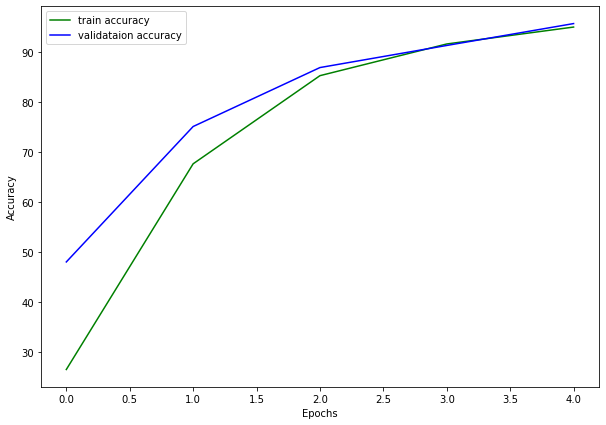

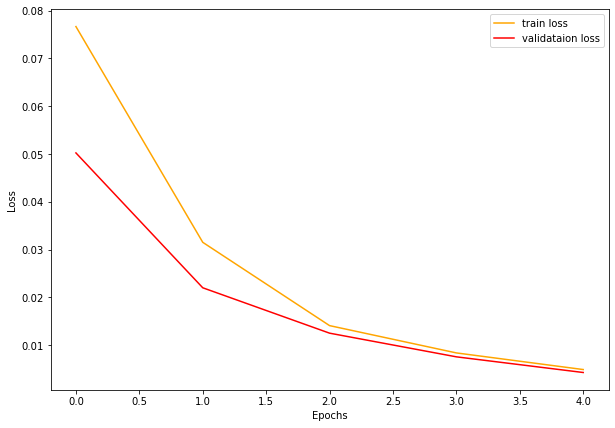

Saving model...


In [8]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./dataset/output/accuracy.png')
plt.show()
 
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./dataset/output/loss.png')
plt.show()
# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), './dataset/output/model.pth')


### result :  <strong> accuracy</strong> 
<img src="./dataset/output/accuracy.png" alt="accuracy" />

### result :  <strong> loss </strong> 
<img src="./dataset/output/loss.png" alt="loss" />

# 6- Testing the Model :

In [9]:
import matplotlib.pyplot as plt
import torch
import joblib
import torch.nn as nn
import numpy as np
import cv2
import albumentations
import torch.nn.functional as F
import time
import cnn_models

Enter the path of test image :./dataset/asl_alphabet_test/asl_alphabet_test/R_test.jpg
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=29, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Model loaded
torch.Size([1, 3, 224, 224])
PREDS tensor([17])
Predicted output: R
0.100 seconds


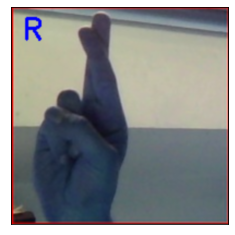

In [10]:


test_img=str(input("Enter the path of test image :"))


aug = albumentations.Compose([
                albumentations.Resize(224, 224, always_apply=True),
])

# load label binarizer
lb = joblib.load('./dataset/output/lb.pkl')


model = cnn_models.CustomCNN()
model.load_state_dict(torch.load('./dataset/output/model.pth'))
print(model)
print('Model loaded')


image = cv2.imread(test_img)
image_copy = image.copy()
 
image = aug(image=np.array(image))['image']
image = np.transpose(image, (2, 0, 1)).astype(np.float32)
image = torch.tensor(image, dtype=torch.float)
image = image.unsqueeze(0)
print(image.shape)


start = time.time()
outputs = model(image)
_, preds = torch.max(outputs.data, 1)
print('PREDS', preds)
print(f"Predicted output: {lb.classes_[preds]}")
end = time.time()
print(f"{(end-start):.3f} seconds")
 
cv2.putText(image_copy, lb.classes_[preds], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

plt.imshow(image_copy, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
#cv2.imshow('image', image_copy)
#cv2.waitKey(0)


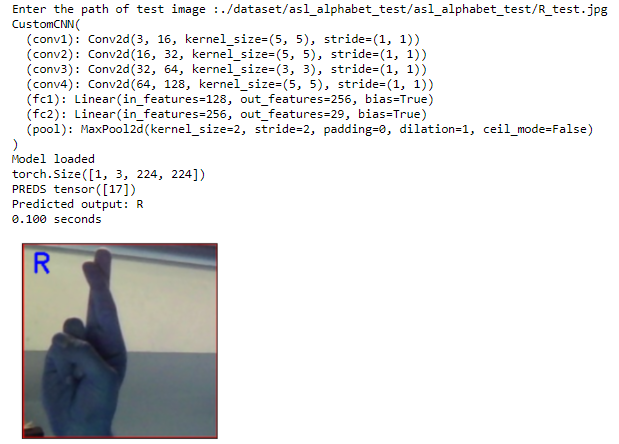

# 7- Real time capture:

In [1]:
import torch
import joblib
import torch.nn as nn
import numpy as np
import cv2
import torch.nn.functional as F
import time
import cnn_models
 
# load label binarizer
lb = joblib.load('./dataset/output/lb.pkl')
model = cnn_models.CustomCNN()
model.load_state_dict(torch.load('./dataset/output/model.pth'))
print(model)
print('Model loaded')


def hand_area(img):
    hand = img[100:324, 100:324]
    hand = cv2.resize(hand, (224,224))
    return hand


cap = cv2.VideoCapture(0)
if (cap.isOpened() == False):
    print('Error while trying to open camera. Plese check again...')
# get the frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
# define codec and create VideoWriter object
out = cv2.VideoWriter('./dataset/output/asl.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width,frame_height))


while(cap.isOpened()):
    # capture each frame of the video
    ret, frame = cap.read()
    # get the hand area on the video capture screen
    cv2.rectangle(frame, (100, 100), (324, 324), (20, 34, 255), 2)
    hand = hand_area(frame)
    image = hand
    
    image = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image = torch.tensor(image, dtype=torch.float)
    image = image.unsqueeze(0)
    
    outputs = model(image)
    _, preds = torch.max(outputs.data, 1)
    
    cv2.putText(frame, lb.classes_[preds], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    #plt.imshow(frame, cmap = 'gray', interpolation = 'bicubic')
    #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    #plt.show()
    cv2.imshow('image', frame)
    exit()
    out.write(frame)
    # press `q` to exit
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
# release VideoCapture()
cap.release()
# close all frames and video windows
cv2.destroyAllWindows()



Loading label binarizer...
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=29, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Model loaded
